In [1]:
!pip install yfinance


In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the website with Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to fetch the raw HTML content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')


table = soup.find('table')
rows = table.find_all('tr')

# Extract data and store in a list
data = []
for row in rows:
    cols = row.find_all(['td', 'th'])
    cols = [ele.get_text(strip=True) for ele in cols]
    if len(cols) > 1:  # to ensure empty rows are not added
        data.append(cols)

# Convert the list to a DataFrame
tesla_revenue = pd.DataFrame(data[1:], columns=data[0])  # assuming the first row is the header


In [31]:
# Display the last five rows
tesla_revenue_tail = tesla_revenue.tail()

print(tesla_revenue_tail)


    2021 $53,823
7   2013  $2,013
8   2012    $413
9   2011    $204
10  2010    $117
11  2009    $112


In [15]:
import yfinance as yf

gme_data = yf.download('GME')

# Reset the index
gme_data_reset = gme_data.reset_index()

# Display the first five rows
gme_data_head = gme_data_reset.head()

print(gme_data_head)

[*********************100%%**********************]  1 of 1 completed

        Date     Open     High      Low    Close  Adj Close    Volume
0 2002-02-13  2.40625  2.51500  2.38125  2.51250   1.691667  76216000
1 2002-02-14  2.54375  2.54875  2.48125  2.50000   1.683251  11021600
2 2002-02-15  2.50000  2.50625  2.46250  2.48750   1.674834   8389600
3 2002-02-19  2.47500  2.47500  2.34375  2.38750   1.607504   7410400
4 2002-02-20  2.40000  2.46875  2.38125  2.46875   1.662210   6892800


In [19]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Question 3: Use yfinance to Extract Stock Data

# Download GameStop stock data
gme_data = yf.download('GME')

# Reset the index
gme_data_reset = gme_data.reset_index()

# Display the first five rows
gme_data_head = gme_data_reset.head()
print("First five rows of GameStop stock data:")
print(gme_data_head)


# Question 4: Use Webscraping to Extract GME Revenue Data

# URL of the website with GameStop revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to fetch the raw HTML content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables in the HTML
tables = soup.find_all('table')

# Check if any tables are found
if not tables:
    raise ValueError("No tables found on the webpage")

# Assuming the first table is the one we want
table = tables[0]

# Extract rows from the table
rows = table.find_all('tr')

# Extract data and store in a list
data = []
for row in rows:
    cols = row.find_all(['td', 'th'])
    cols = [ele.get_text(strip=True) for ele in cols]
    if len(cols) > 1:  # to ensure empty rows are not added
        data.append(cols)

# Check if data is extracted
if not data:
    raise ValueError("No data extracted from the table")

# Convert the list to a DataFrame
gme_revenue = pd.DataFrame(data[1:], columns=data[0])  # assuming the first row is the header

# Display the last five rows
gme_revenue_tail = gme_revenue.tail()
print("\nLast five rows of GameStop revenue data:")
print(gme_revenue_tail)


[*********************100%%**********************]  1 of 1 completed


First five rows of GameStop stock data:
        Date     Open     High      Low    Close  Adj Close    Volume
0 2002-02-13  2.40625  2.51500  2.38125  2.51250   1.691667  76216000
1 2002-02-14  2.54375  2.54875  2.48125  2.50000   1.683250  11021600
2 2002-02-15  2.50000  2.50625  2.46250  2.48750   1.674834   8389600
3 2002-02-19  2.47500  2.47500  2.34375  2.38750   1.607504   7410400
4 2002-02-20  2.40000  2.46875  2.38125  2.46875   1.662210   6892800

Last five rows of GameStop revenue data:
    2020  $6,466
10  2009  $8,806
11  2008  $7,094
12  2007  $5,319
13  2006  $3,092
14  2005  $1,843


In [20]:
pip install matplotlib


[*********************100%%**********************]  1 of 1 completed


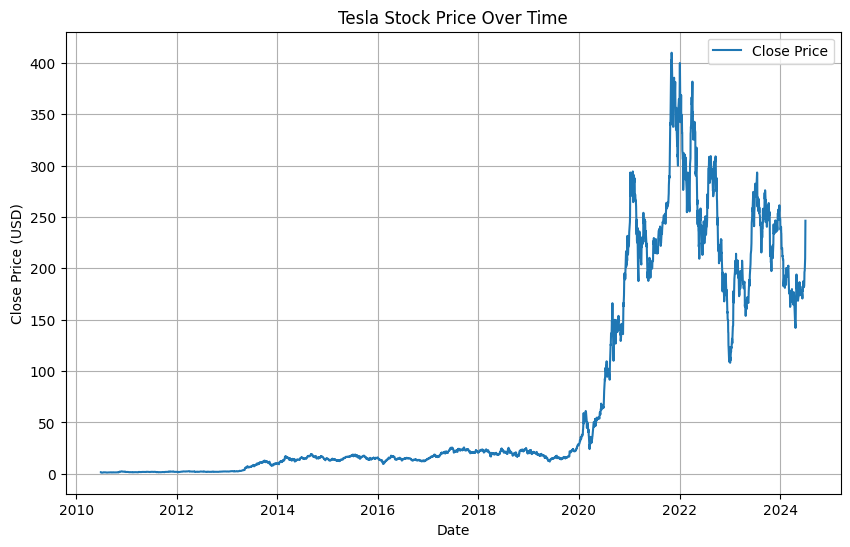

In [21]:
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Download Tesla stock data
tesla_data = yf.download('TSLA')

# Reset the index
tesla_data_reset = tesla_data.reset_index()

# Plot the Tesla stock data
make_graph(tesla_data_reset, 'Tesla Stock Price Over Time')


[*********************100%%**********************]  1 of 1 completed


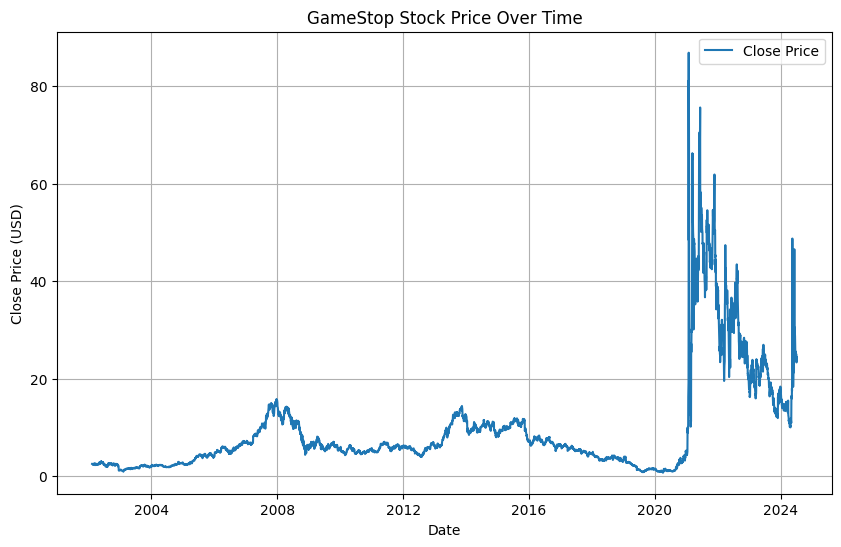

In [23]:


# Define the make_graph function
def make_graph(stock_data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Download GameStop stock data
gme_data = yf.download('GME')

# Reset the index
gme_data_reset = gme_data.reset_index()

# Plot the GameStop stock data
make_graph(gme_data_reset, 'GameStop Stock Price Over Time')
